In [38]:
import numpy as np
import matplotlib.pyplot as plt


N:  10
Training error:  0.1677950681110375
Testing error:  0.16598765152433578
Important observation: uderfitting


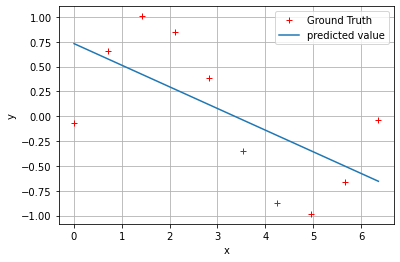

N:  100
Training error:  0.045175230972755054
Testing error:  0.04589166989097059
Important observation: uderfitting


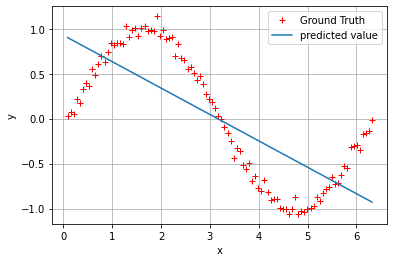

N:  1000
Training error:  0.01408121219530443
Testing error:  0.014080045165833445
Important observation: uderfitting


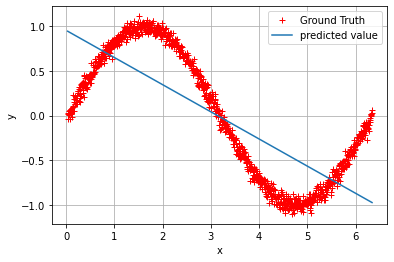

In [50]:
# Writing N=10,100,1000 as a part of one loop, m=1, linear case
for j in range(3):
    # Number of training/test samples
    m=1
    #the number of training data points
    N = 10**(j+1)
    # Generate equispaced floats in the interval [0, 2π]
    x = np.linspace(0, 2*np.pi, N)
    # Generate noise
    mean = 0
    std = 0.05
    # Generate some numbers from the sine function
    y = np.sin(x)
    # Add noise
    y += np.random.normal(mean, std, N)

    
    # y cap =b0+b1.x

    # X is our matrix [1, x1; 1, x2;,....]
    X=np.array([np.ones(N),x])
    for i in range(m-1):
        X=np.append(X,X[1,:]**(i+2))
    X=np.reshape(X,(m+1,N)).T
    
    
    #The optimal B vector [b_0; b_1] is (X.T * X)^-1 X.T y
    pseudo_inv = np.linalg.inv(np.matmul(X.T,X))
    B=np.matmul(pseudo_inv,np.matmul(X.T,y))


    #number of test cases T, lets go with N_test=N
    N_test=N
    
    #X_test is similar to X, except this is for testing 
    X_test=np.array([np.ones(N_test),np.linspace(0.1*np.random.rand(),2*np.pi+0.1*np.random.rand(),N_test)])
    for i in range(m-1):
        X_test=np.append(X_test,X_test[1,:]**(i+2))
    X_test=np.reshape(X_test,(m+1,N)).T

    # Generate some numbers from the sine function
    y_test = np.sin(x)
    # Add noise
    y_test += np.random.normal(mean, std, N_test)

    # The y_cap vector in training
    y_cap_train=np.matmul(X,B)
    # The y_cap vector in testing
    y_cap_test=np.matmul(X_test,B)


    #R(theta) is given as
    train_error=0
    for i in range(N):
        train_error+=np.square(y[i]-y_cap_train[i])
    train_error=np.sqrt(train_error)/N_test
    test_error=0
    for i in range(N_test):
        test_error+=np.square(y_test[i]-y_cap_test[i])
    test_error=np.sqrt(test_error)/N_test

    print("N: ",N)
    print("Training error: ", train_error)
    print("Testing error: ", test_error)
    print("Important observation: uderfitting")
    
    #Dsiplay the data
    plt.plot(X_test[:,1], y_test,'r+', label = 'Ground Truth lables')
    plt.plot(X_test[:,1], y_cap_test, label = 'predicted value')
    plt.legend()
    plt.grid(1)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()


m:  2
N:  10
Training error:  0.16040959281553827
Testing error:  0.16833852284124534
Important observation: uderfitting


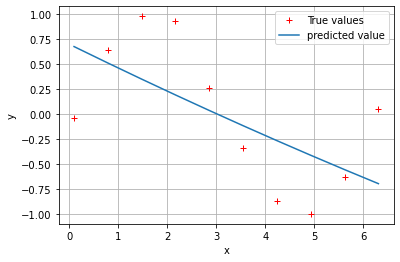

m:  2
N:  100
Training error:  0.04564887949404894
Testing error:  0.045473425523124035
Important observation: uderfitting


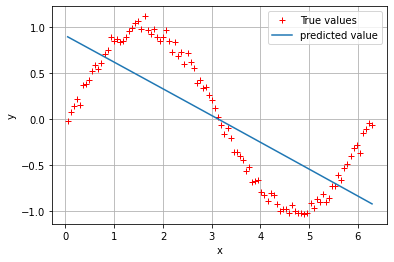

m:  2
N:  1000
Training error:  0.01415000791009621
Testing error:  0.01406129987110508
Important observation: uderfitting


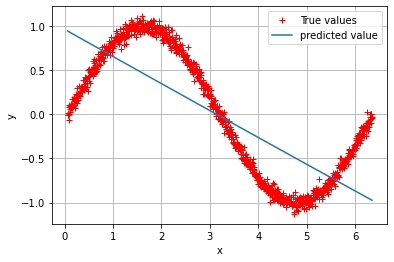

m:  3
N:  10
Training error:  0.034861137470712934
Testing error:  0.04231355997554245
The model is fitting fine


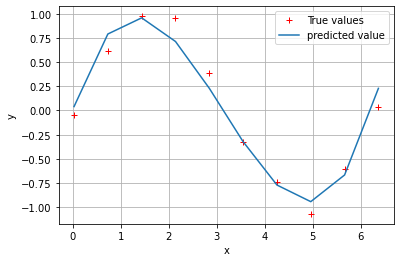

m:  3
N:  100
Training error:  0.00850139634101811
Testing error:  0.011163421774101638
The model is fitting fine


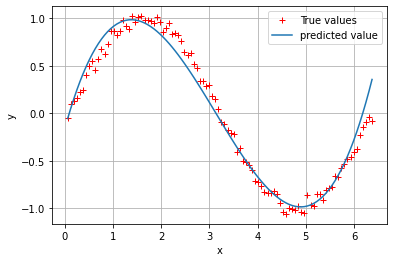

m:  3
N:  1000
Training error:  0.002617520141537164
Testing error:  0.0026519530906056327
The model is fitting fine


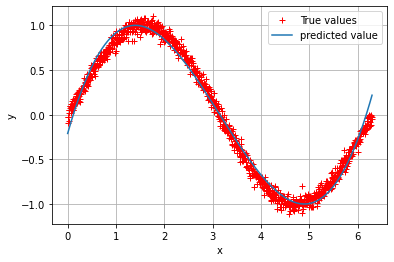

m:  4
N:  10
Training error:  0.028775573766224506
Testing error:  0.03752258934844117
The model is fitting fine


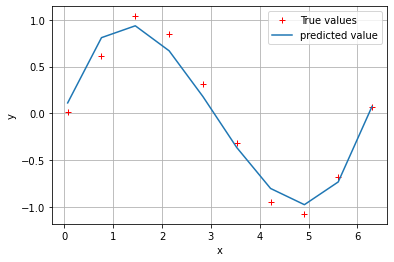

m:  4
N:  100
Training error:  0.008612836967763599
Testing error:  0.008529578205057578
The model is fitting fine


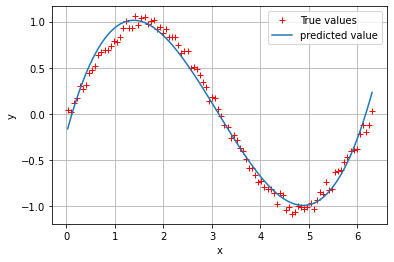

m:  4
N:  1000
Training error:  0.002533942306626808
Testing error:  0.0033000293313151154
The model is fitting fine


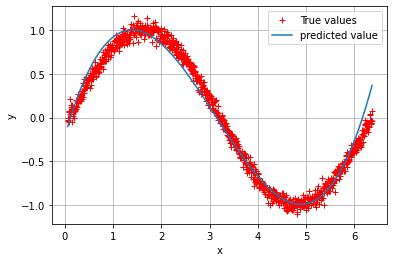

m:  5
N:  10
Training error:  0.013614170859424918
Testing error:  0.02367790292148552
The model is fitting fine


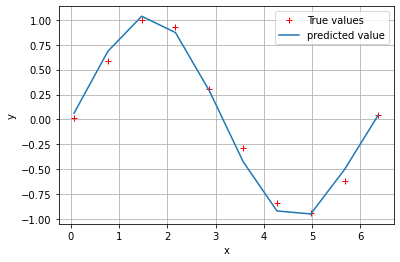

m:  5
N:  100
Training error:  0.005096798034674836
Testing error:  0.007053085840437397
The model is fitting fine


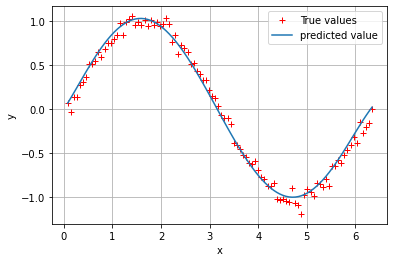

m:  5
N:  1000
Training error:  0.001575758296435516
Testing error:  0.0019232796004901682
The model is fitting fine


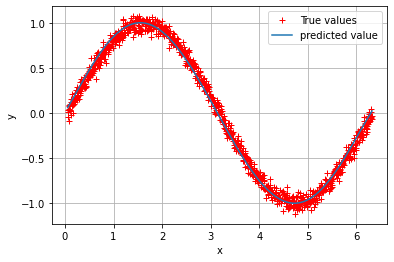

In [51]:
#This is the polynomial case, here we will iterate through m from 2 to 5
for m in range(2,6):
    # Writing N=10,100,1000 as a part of one loop,
    for j in range(3):
        # Number of training/test samples
        N = 10**(j+1)
        # Generate equispaced floats in the interval [0, 2π]
        x = np.linspace(0, 2*np.pi, N)
        # Generate noise
        mean = 0
        std = 0.05
        # Generate some numbers from the sine function
        y = np.sin(x)
        # Add noise
        y += np.random.normal(mean, std, N)

        # m=1
        # y^=b0+b1x

        
        # X is our matrix [1, x1, x1^2,..,x1^m; 1, x2, x2^2,..,x2^m;,....]
        X=np.array([np.ones(N),x])
        for i in range(m-1):
            X=np.append(X,x**(i+2))
        X=np.reshape(X,(m+1,N)).T


        #The optimal B vector [b_0; b_1] is (X.T * X)^-1 X.T y
        pseudo_inv = np.linalg.inv(np.matmul(X.T,X))
        B=np.matmul(pseudo_inv,np.matmul(X.T,y))
        

        #number of test cases T, lets go with N_test=N
        N_test=N
        x_test=np.linspace(0.1*np.random.rand(),2*np.pi+0.1*np.random.rand(),N_test)
        X_test=np.array([np.ones(N_test),x_test])
        for i in range(m-1):
            X_test=np.append(X_test,x_test**(i+2))
        X_test=np.reshape(X_test,(m+1,N)).T
        #print(X_test)

        # Generate some numbers from the sine function
        y_test = np.sin(x)
        # Add noise
        y_test += np.random.normal(mean, std, N_test)

        # The y_cap vector in training
        y_cap_train=np.matmul(X,B)
        # The y_cap vector in testing
        y_cap_test=np.matmul(X_test,B)

        #print(y_cap)

        #R(theta) is given as
        train_error=0
        for i in range(N):
            train_error+=np.square(y[i]-y_cap_train[i])
        train_error=np.sqrt(train_error)/N_test
        test_error=0
        for i in range(N_test):
            test_error+=np.square(y_test[i]-y_cap_test[i])
        test_error=np.sqrt(test_error)/N_test
        print("m: ",m)
        print("N: ",N)
        print("Training error: ", train_error)
        print("Testing error: ", test_error)
        if m==2:
            print("Important observation: uderfitting")
        else :
            print("The model is fitting fine")
        
        #Dsiplay the data
        plt.plot(X_test[:,1], y_test,'r+', label = 'Ground truth lables')
        plt.plot(X_test[:,1], y_cap_test, label = 'predicted value')
        plt.legend()
        plt.grid(1)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()
